# Dummy example

I want to learn a function, that preserves the topology the latent space

In [4]:
import gudhi
import numpy as np
import matplotlib.pyplot as plt

from torch_topological.nn import VietorisRipsComplex, WassersteinDistance

import torch.nn as nn
import torch

from gudhi.wasserstein import wasserstein_distance
from torch.optim.lr_scheduler import LambdaLR
from sklearn.decomposition import PCA

2024-02-26 17:15:30.900595: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-26 17:15:30.947500: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-26 17:15:30.947533: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-26 17:15:30.948684: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-26 17:15:30.956246: I tensorflow/core/platform/cpu_feature_guar

In [5]:
def wasserstein_based_loss_gudhi(features_1, features_2):
    rips = gudhi.RipsComplex(points=features_1, max_edge_length=0.5)
    rips_1 = gudhi.RipsComplex(points=features_2, max_edge_length=0.5)
    # for the first Point cloud
    st = rips.create_simplex_tree(max_dimension=2)
    st.compute_persistence()
    i = st.flag_persistence_generators()
    if len(i[1]) > 0:
        i1 = torch.tensor(i[1][0])  # pytorch sometimes interprets it as a tuple otherwise
    else:
        i1 = torch.empty((0, 4), dtype=int)
    # for the seconds Point cloud
    st_1 = rips_1.create_simplex_tree(max_dimension=2)
    st_1.compute_persistence()
    i_1 = st_1.flag_persistence_generators()
    if len(i_1[1]) > 0:
        i1_1 = torch.tensor(i_1[1][0])
    else:
        i1_1 = torch.empty((0, 4), dtype=int)
        
    # Same as the finite part of st.persistence_intervals_in_dimension(1), but differentiable
    diag = torch.norm(features_1[i1[:, (0, 2)]] - features_1[i1[:, (1, 3)]], dim=-1)
    diag1 = torch.norm(features_2[i1_1[:, (0, 2)]] - features_2[i1_1[:, (1, 3)]], dim=-1)

    
    wasser = wasserstein_distance(diag, 
                                  diag1, 
                                  order=1, 
                                  enable_autodiff=True)
    print("wasser", wasser)
    return wasser


In [6]:
def wasserstein_loss(features_1, features_2):
    vr = VietorisRipsComplex(dim=1, p=2)
    vr_2 = VietorisRipsComplex(dim=1, p=2)
    distance = WassersteinDistance(p=2, q=1)
    # for the first Point cloud
    pi_1 = vr(features_1)
    print(pi_1)
    pi_2 = vr_2(features_2)

    wasser = distance(pi_1, pi_2)

    l2 = nn.MSELoss()
    loss_2 = l2(features_1, features_2)
    print("wasser", wasser)
    return wasser + loss_2

In [7]:
network = nn.Sequential(
    nn.Linear(200, 10),
    nn.ReLU(),)


[PersistenceInformation(pairing=array([[30, 30, 28],
       [47, 47,  9],
       [ 7,  7,  0],
       [28, 28,  4],
       [ 0, 38,  0],
       [ 4, 30,  9],
       [49, 49, 32],
       [10, 28, 10],
       [ 1, 18,  1],
       [26, 26, 12],
       [ 8,  8,  1],
       [32, 49,  0],
       [ 9, 30, 24],
       [38, 32, 12],
       [21, 21, 18],
       [12, 38, 28],
       [41, 41,  6],
       [24, 47, 41],
       [ 6, 49, 21],
       [34, 34, 12],
       [16, 16,  7],
       [18, 26, 25],
       [33, 33, 15],
       [25, 34, 33],
       [15, 32,  2],
       [22, 22, 10],
       [27, 27, 12],
       [42, 42, 37],
       [37, 42, 25],
       [43, 43, 10],
       [ 2, 15,  3],
       [46, 46, 12],
       [36, 36, 12],
       [23, 23, 18],
       [ 3, 32, 17],
       [19, 36, 19],
       [ 5, 23,  5],
       [44, 44, 17],
       [45, 45, 43],
       [29, 29,  4],
       [11, 11,  7],
       [48, 48, 29],
       [20, 20, 16],
       [17, 46, 39],
       [13, 13, 11],
       [40, 40, 19],
  

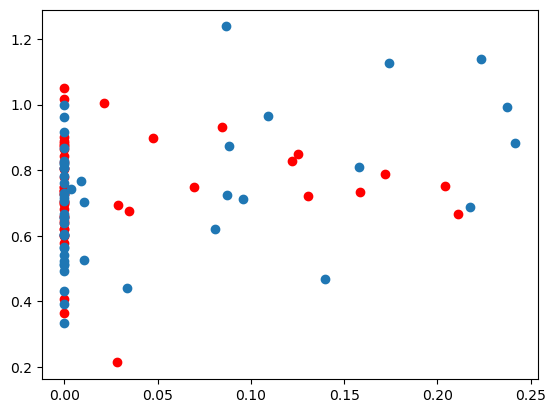

[PersistenceInformation(pairing=array([[42, 42,  9],
       [38, 38, 14],
       [37, 37, 31],
       [43, 43, 13],
       [13, 43, 20],
       [18, 40, 18],
       [28, 28, 21],
       [14, 14,  6],
       [47, 47, 40],
       [36, 36, 15],
       [40, 40, 27],
       [26, 44, 26],
       [20, 13,  5],
       [31, 31, 22],
       [34, 34, 30],
       [27, 40, 30],
       [48, 48, 23],
       [23, 23,  8],
       [46, 46, 40],
       [12, 26, 12],
       [30, 27, 22],
       [44, 44, 39],
       [11, 24, 11],
       [ 9, 42, 38],
       [ 6, 42,  7],
       [19, 37, 19],
       [ 5, 13,  7],
       [22, 18, 16],
       [ 7, 42, 34],
       [41, 41, 37],
       [16, 30, 15],
       [45, 45, 24],
       [15, 20, 17],
       [24, 45, 28],
       [10, 43, 10],
       [17, 47, 39],
       [39, 19, 11],
       [21, 39,  1],
       [ 1, 45, 25],
       [ 8, 23,  7],
       [25, 37, 29],
       [32, 32, 21],
       [29, 26,  3],
       [ 3, 10,  0],
       [ 0, 25,  2],
       [33, 33, 19],
  

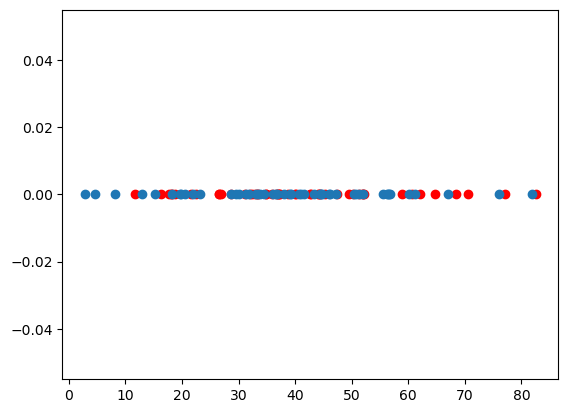

[PersistenceInformation(pairing=array([[27, 37, 27],
       [32, 32,  4],
       [34, 34, 14],
       [45, 45, 10],
       [43, 43, 12],
       [ 4, 32,  5],
       [ 7,  7,  0],
       [30, 30, 16],
       [36, 36,  1],
       [10, 10,  4],
       [42, 42,  1],
       [37, 37, 34],
       [ 1, 36,  8],
       [14, 14,  8],
       [ 8, 27,  5],
       [19, 19,  6],
       [ 0,  7,  1],
       [40, 40, 26],
       [16, 48, 30],
       [20, 20, 17],
       [44, 44,  0],
       [41, 41,  1],
       [24, 24, 11],
       [18, 18,  8],
       [39, 39, 35],
       [46, 46, 14],
       [22, 22, 15],
       [ 5, 27, 26],
       [12, 12,  6],
       [ 3, 26,  3],
       [35, 39,  3],
       [ 6, 19, 17],
       [48, 48, 12],
       [17, 48, 41],
       [26, 42, 15],
       [25, 25,  8],
       [15, 44, 23],
       [13, 38, 13],
       [23, 45, 24],
       [49, 49, 29],
       [47, 47, 15],
       [29, 29, 18],
       [11, 48,  2],
       [28, 28, 25],
       [ 2, 43, 38],
       [38, 38, 31],
  

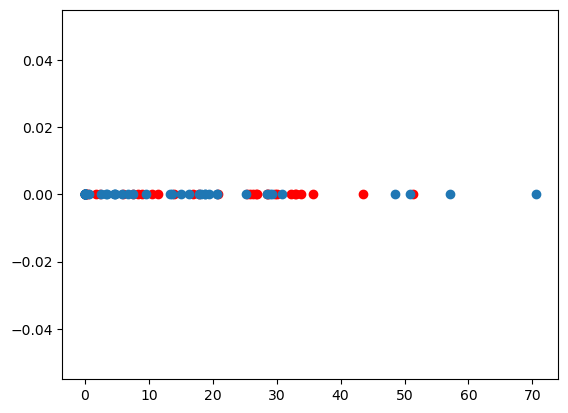

[PersistenceInformation(pairing=array([[19, 19, 12],
       [44, 44, 38],
       [25, 25, 21],
       [37, 37, 24],
       [33, 33,  2],
       [48, 48, 43],
       [24, 24,  8],
       [43, 48, 33],
       [45, 45, 10],
       [38, 44, 13],
       [ 2, 43, 13],
       [13, 44, 12],
       [11, 11,  2],
       [40, 40, 17],
       [29, 29,  1],
       [12, 12, 10],
       [16, 16,  8],
       [17, 40, 10],
       [36, 36, 29],
       [ 5,  5,  0],
       [22, 22, 16],
       [23, 23, 11],
       [35, 35,  3],
       [18, 18, 16],
       [ 8, 37,  3],
       [10, 13,  6],
       [ 6, 13,  9],
       [ 9, 48, 22],
       [ 1, 36, 25],
       [41, 41, 14],
       [47, 47, 32],
       [ 3, 37, 34],
       [26, 26, 22],
       [21, 29, 22],
       [34, 21, 14],
       [ 4,  4,  2],
       [28, 28, 16],
       [49, 49, 41],
       [14, 34, 27],
       [32, 47, 23],
       [ 7,  7,  6],
       [42, 42,  5],
       [27, 43, 39],
       [ 0,  5,  3],
       [39, 23, 15],
       [30, 36, 30],
  

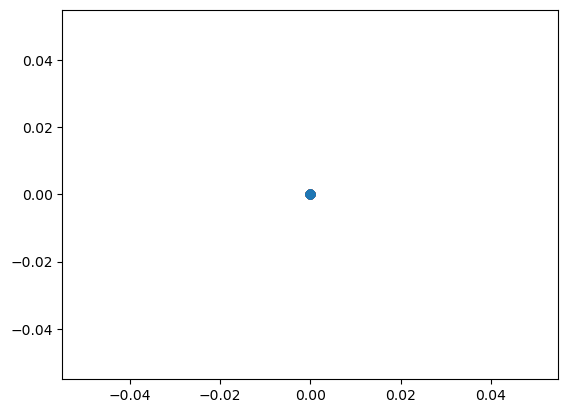

[PersistenceInformation(pairing=array([[16, 16, 15],
       [41, 41, 16],
       [42, 42, 19],
       [33, 33, 11],
       [11, 33,  7],
       [ 8,  8,  7],
       [23, 34, 23],
       [46, 46, 33],
       [34, 34, 13],
       [28, 28,  7],
       [49, 49, 17],
       [19, 42, 24],
       [48, 48,  9],
       [47, 47,  6],
       [37, 37, 18],
       [32, 40, 32],
       [24, 42,  6],
       [18, 18,  0],
       [13, 34,  0],
       [ 6, 47, 41],
       [45, 45,  1],
       [39, 39,  6],
       [17, 49, 44],
       [27, 27,  3],
       [ 9, 48, 29],
       [15, 19, 11],
       [36, 36,  2],
       [43, 43, 36],
       [ 2, 43, 39],
       [ 7, 43, 23],
       [ 0, 47, 27],
       [35, 35,  5],
       [40, 32, 16],
       [14, 14,  2],
       [26, 26, 11],
       [44, 49, 32],
       [10, 12, 10],
       [38, 38, 14],
       [ 1, 45, 10],
       [12, 45, 38],
       [ 3, 45, 25],
       [29, 29, 22],
       [22,  9,  2],
       [31, 31, 22],
       [ 5,  5,  0],
       [ 4, 10,  4],
  

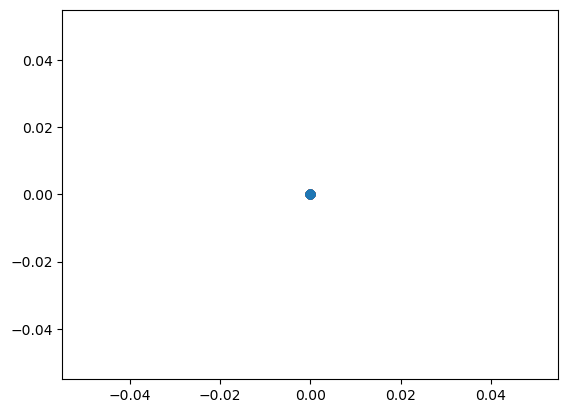

[PersistenceInformation(pairing=array([[49, 49, 26],
       [48, 48, 11],
       [47, 47, 29],
       [25, 25, 14],
       [24, 24, 21],
       [11, 48, 28],
       [45, 45, 40],
       [10, 10,  0],
       [28, 28, 27],
       [33, 33,  8],
       [21, 21,  2],
       [27, 27, 21],
       [36, 36, 10],
       [39, 39, 35],
       [42, 42,  8],
       [46, 46, 22],
       [ 8, 42, 36],
       [ 7,  7,  0],
       [31, 31, 30],
       [41, 41, 34],
       [23, 23,  2],
       [26, 49, 46],
       [34, 41,  7],
       [40, 45, 39],
       [15, 15,  9],
       [17, 17,  9],
       [ 2, 23, 19],
       [44, 44, 16],
       [30, 30, 13],
       [35, 40, 18],
       [ 0, 42, 19],
       [22, 46,  1],
       [43, 43, 41],
       [16, 16,  3],
       [19, 43, 38],
       [32, 32, 17],
       [18, 35, 25],
       [38, 24, 22],
       [ 1, 23, 14],
       [ 3, 44,  1],
       [14, 16, 15],
       [29, 47, 10],
       [ 9, 43, 13],
       [13, 17,  4],
       [20, 20, 18],
       [37, 37, 29],
  

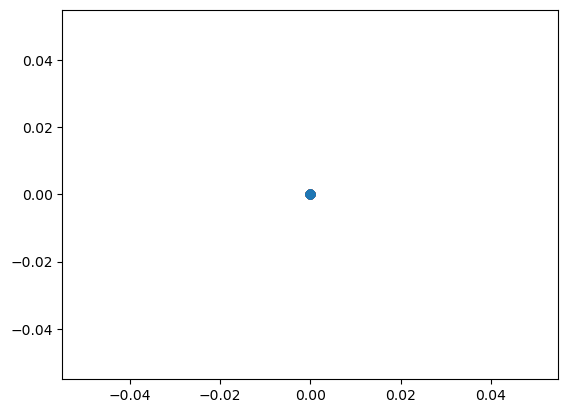

[PersistenceInformation(pairing=array([], shape=(0, 3), dtype=int64), diagram=tensor([], size=(0, 2), grad_fn=<StackBackward0>), dimension=0), PersistenceInformation(pairing=array([], shape=(0, 4), dtype=int64), diagram=tensor([], size=(0, 2), grad_fn=<StackBackward0>), dimension=1)]
wasser tensor(0., grad_fn=<PowBackward0>)
[PersistenceInformation(pairing=array([], shape=(0, 3), dtype=int64), diagram=tensor([], size=(0, 2), grad_fn=<StackBackward0>), dimension=0), PersistenceInformation(pairing=array([], shape=(0, 4), dtype=int64), diagram=tensor([], size=(0, 2), grad_fn=<StackBackward0>), dimension=1)]
wasser tensor(0., grad_fn=<PowBackward0>)


/home/jmordacq/miniconda3/envs/difftda/lib/python3.9/site-packages/ot/lp/__init__.py:107: RuntimeWarning: invalid value encountered in scalar divide
  c = (b.dot(beta0) - a.dot(alpha0)) / (a.sum() + b.sum())
/home/jmordacq/miniconda3/envs/difftda/lib/python3.9/site-packages/ot/lp/__init__.py:547: UserWarning: Problem infeasible. Check that a and b are in the simplex
  check_result(result_code)


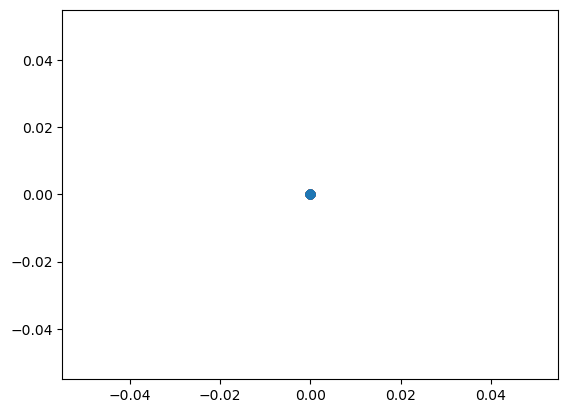

[PersistenceInformation(pairing=array([], shape=(0, 3), dtype=int64), diagram=tensor([], size=(0, 2), grad_fn=<StackBackward0>), dimension=0), PersistenceInformation(pairing=array([], shape=(0, 4), dtype=int64), diagram=tensor([], size=(0, 2), grad_fn=<StackBackward0>), dimension=1)]
wasser tensor(0., grad_fn=<PowBackward0>)
[PersistenceInformation(pairing=array([], shape=(0, 3), dtype=int64), diagram=tensor([], size=(0, 2), grad_fn=<StackBackward0>), dimension=0), PersistenceInformation(pairing=array([], shape=(0, 4), dtype=int64), diagram=tensor([], size=(0, 2), grad_fn=<StackBackward0>), dimension=1)]
wasser tensor(0., grad_fn=<PowBackward0>)


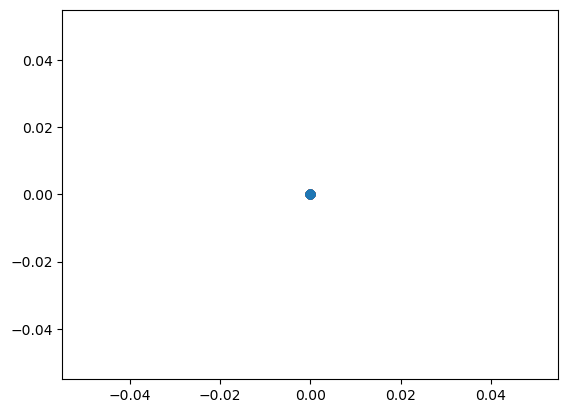

[PersistenceInformation(pairing=array([], shape=(0, 3), dtype=int64), diagram=tensor([], size=(0, 2), grad_fn=<StackBackward0>), dimension=0), PersistenceInformation(pairing=array([], shape=(0, 4), dtype=int64), diagram=tensor([], size=(0, 2), grad_fn=<StackBackward0>), dimension=1)]
wasser tensor(0., grad_fn=<PowBackward0>)
[PersistenceInformation(pairing=array([], shape=(0, 3), dtype=int64), diagram=tensor([], size=(0, 2), grad_fn=<StackBackward0>), dimension=0), PersistenceInformation(pairing=array([], shape=(0, 4), dtype=int64), diagram=tensor([], size=(0, 2), grad_fn=<StackBackward0>), dimension=1)]
wasser tensor(0., grad_fn=<PowBackward0>)


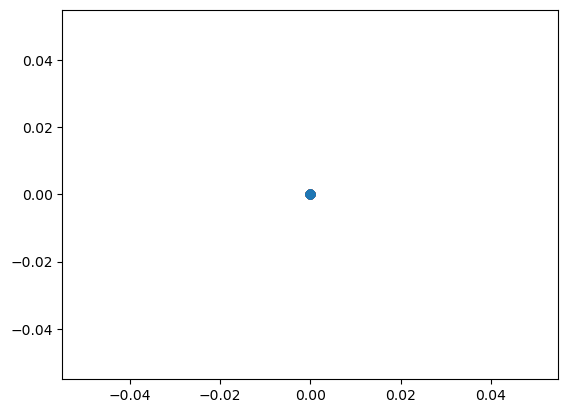

[PersistenceInformation(pairing=array([], shape=(0, 3), dtype=int64), diagram=tensor([], size=(0, 2), grad_fn=<StackBackward0>), dimension=0), PersistenceInformation(pairing=array([], shape=(0, 4), dtype=int64), diagram=tensor([], size=(0, 2), grad_fn=<StackBackward0>), dimension=1)]
wasser tensor(0., grad_fn=<PowBackward0>)
[PersistenceInformation(pairing=array([], shape=(0, 3), dtype=int64), diagram=tensor([], size=(0, 2), grad_fn=<StackBackward0>), dimension=0), PersistenceInformation(pairing=array([], shape=(0, 4), dtype=int64), diagram=tensor([], size=(0, 2), grad_fn=<StackBackward0>), dimension=1)]
wasser tensor(0., grad_fn=<PowBackward0>)


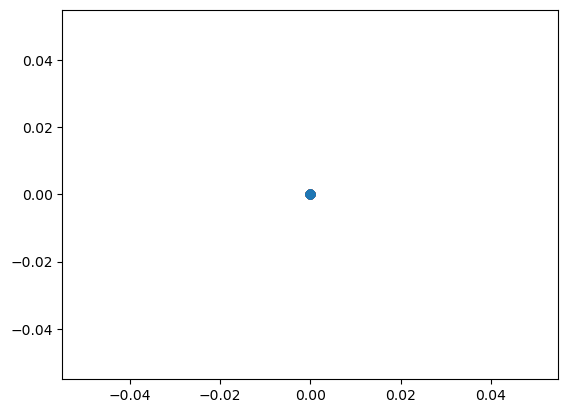

[PersistenceInformation(pairing=array([], shape=(0, 3), dtype=int64), diagram=tensor([], size=(0, 2), grad_fn=<StackBackward0>), dimension=0), PersistenceInformation(pairing=array([], shape=(0, 4), dtype=int64), diagram=tensor([], size=(0, 2), grad_fn=<StackBackward0>), dimension=1)]
wasser tensor(0., grad_fn=<PowBackward0>)


In [8]:
X = torch.tensor(np.random.rand(50, 200), dtype=torch.float32)
Y = torch.tensor(np.random.rand(50, 200), dtype=torch.float32)

losses = []
# learn a latent space where the Wasserstein distance is minimized between the two point clouds

opt = torch.optim.SGD(network.parameters(), lr=1)
scheduler = LambdaLR(opt,[lambda epoch: 10./(10+epoch)])
for idx in range(20):
    view_1 = network(X)
    view_2 = network(Y)
    opt.zero_grad() 
    # loss = wasserstein_based_loss(view_1, view_2)
    loss = wasserstein_loss(view_1, view_2)
    loss.backward()
    losses.append(loss.item())
    opt.step()
    # Draw every 100 epochs
    if idx % 2 == 0:
        latent_X = view_1.detach().numpy()
        latent_Y = view_2.detach().numpy()
        
        plt.scatter(latent_X[:, 0], latent_X[:, 1], c="r")
        plt.scatter(latent_Y[:, 0], latent_Y[:, 1])
        plt.show()


Text(0.5, 1.0, 'Wasserstein loss on persistence diagrams in the latent space')

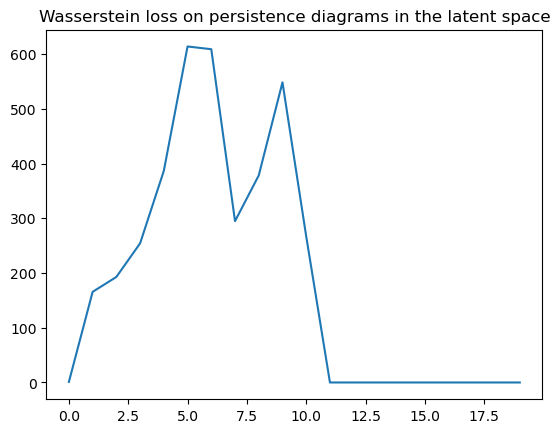

In [9]:
plt.plot(losses)
plt.title("Wasserstein loss on persistence diagrams in the latent space")